In [1]:
%load_ext rpy2.ipython

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from rpy2.robjects import pandas2ri

%matplotlib inline

pandas2ri.activate()

In this chapter we relax the linearity assumption while still attempting to maintain as much interpretability as possible. We do this by examining very simple extensions of linear models like:  

  * *Polynomial regression* extends the linear model by adding extra predictors, obtained by raising each of the original predictors to a power.  
  <br>
  * *Step functions* cut the range of a variable into $K$ distint regions in order to produce a qualitative variable. 
  <br>
  * *Regression splines* are more flexible than polynomials and step functions, and in fact are an extension of the two. They involve dividing the range of $X$ into $K$ distinct regions. Within each region, a polynomial function is fit to the data. These polynomials are constrained so that they join smoothly at the region boundaries, or *knots*.  
  <br>
  * *Smoothing splines* are similar to regression splines, but arise in a slightly different situation. Smoothing splines result from minimizing a residual sum of squarees criterion subject to a smoothness penalty.  
  <br>
  * *Local regression* is similar to spline, but differs in a very important way. The regions are allowed to overlap, and indeed they do so in a very smooth way.  
  <br>
  * *Generalized additive models* allow us to extend the methods above to deal with multiple predictors.  

# Polynomial Regression

Historicall, the standard way to extend linear regression to settings in which the relationship between the predictors and the response is nonlinear has been to replace the standard model  

$$y_i=\beta_0+\beta_1x_i + \epsilon_i$$  

with a polynomial function  

$$y_i = \beta_0+\beta_1x_i + \beta_2x_i^2 + \beta_3x_i^3+...+\beta_dx_i^d+\epsilon_i$$  

where $\epsilon_i$ is the error term. For large enough degree $d$, a polynomial regression can produce an extremely non-linear curve. The coefficients can be easily estimated using least squares linear regression because this is just a standard linear model with predictors $x_i, x_i^2, x_i^3,...,x_i^d$. In general, it is unusual to use $d$ greater than 3 or 4 because for large values of $d$, the polynomial curve can become overly flexible and can take on some strange shapes. 

/Users/tsansom/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


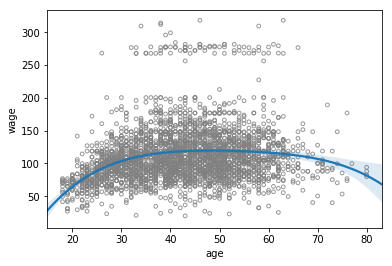

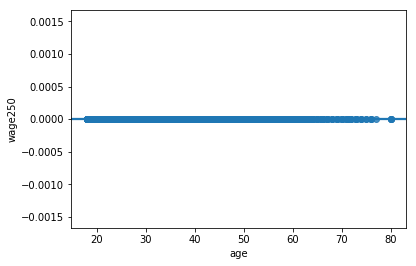

In [34]:
wage = pd.read_csv('../../data/Wage.csv', index_col=0)
wage['wage250'] = 0

sns.regplot(x=wage['age'], y=wage['wage'], order=4, 
            scatter_kws={'facecolors': 'none', 'edgecolors': 'gray', 's': 14})
plt.figure()
sns.regplot(x=wage['age'], y=wage['wage250'], order=4)

In [31]:
wage

year  age      sex            maritl      race           education  \
231655  2006   18  1. Male  1. Never Married  1. White         1.  HS Grad   
86582   2004   24  1. Male  1. Never Married  1. White     4. College Grad   
161300  2003   45  1. Male        2. Married  1. White     3. Some College   
155159  2003   43  1. Male        2. Married  3. Asian     4. College Grad   
11443   2005   50  1. Male       4. Divorced  1. White          2. HS Grad   
376662  2008   54  1. Male        2. Married  1. White     4. College Grad   
450601  2009   44  1. Male        2. Married  4. Other     3. Some College   
377954  2008   30  1. Male  1. Never Married  3. Asian     3. Some College   
228963  2006   41  1. Male  1. Never Married  2. Black     3. Some College   
81404   2004   52  1. Male        2. Married  1. White          2. HS Grad   
302778  2007   45  1. Male       4. Divorced  1. White     3. Some College   
305706  2007   34  1. Male        2. Married  1. White          2. HS Grad   
8690    2005   35  1. Male  1. Never Married  1. White          2. HS Grad   
153561  2003   39  1. Male        2. Married  1. White     4. College Grad   
449654  2009   54  1. Male        2. Married  1. White          2. HS Grad   
447660  2009   51  1. Male        2. Married  1. White     3. Some College   
160191  2003   37  1. Male  1. Never Married  3. Asian     4. College Grad   
230312  2006   50  1. Male        2. Married  1. White  5. Advanced Degree   
301585  2007   56  1. Male        2. Married  1. White     4. College Grad   
153682  2003   37  1. Male  1. Never Married  1. White     3. Some College   
158226  2003   38  1. Male        2. Married  3. Asian     4. College Grad   
11141   2005   40  1. Male       4. Divorced  1. White          2. HS Grad   
448410  2009   75  1. Male        2. Married  1. White     4. College Grad   
305116  2007   40  1. Male        2. Married  1. White     4. College Grad   
233002  2006   38  1. Male  1. Never Married  1. White          2. HS Grad   
8684    2005   49  1. Male        2. Married  1. White  5. Advanced Degree   
229379  2006   43  1. Male        2. Married  1. White          2. HS Grad   
86064   2004   34  1. Male        2. Married  4. Other          2. HS Grad   
378472  2008   57  1. Male        2. Married  1. White          2. HS Grad   
157244  2003   18  1. Male  1. Never Married  2. Black          2. HS Grad   
...      ...  ...      ...               ...       ...                 ...   
304184  2007   59  1. Male        2. Married  3. Asian          2. HS Grad   
154351  2003   29  1. Male  1. Never Married  4. Other     3. Some College   
447182  2009   22  1. Male  1. Never Married  1. White          2. HS Grad   
13962   2005   54  1. Male        2. Married  1. White          2. HS Grad   
154728  2003   46  1. Male        2. Married  2. Black          2. HS Grad   
380298  2008   51  1. Male        2. Married  1. White          2. HS Grad   
230171  2006   35  1. Male  1. Never Married  1. White     3. Some College   
307415  2007   49  1. Male        2. Married  1. White          2. HS Grad   
161305  2003   53  1. Male        2. Married  1. White          2. HS Grad   
451605  2009   61  1. Male        2. Married  1. White     3. Some College   
301838  2007   40  1. Male        2. Married  2. Black         1.  HS Grad   
154752  2003   52  1. Male        2. Married  1. White         1.  HS Grad   
8804    2005   40  1. Male        2. Married  1. White     4. College Grad   
158531  2003   56  1. Male        2. Married  1. White         1.  HS Grad   
379706  2008   39  1. Male        2. Married  1. White          2. HS Grad   
306214  2007   30  1. Male        2. Married  1. White          2. HS Grad   
158084  2003   58  1. Male        2. Married  1. White     3. Some College   
305029  2007   33  1. Male        2. Married  3. Asian  5. Advanced Degree   
307412  2007   51  1. Male        2. Married  1. White  5. Advanced Degree   
377739  2008   32  1. Male  1.